In [1]:
import pandas as pd
from sqlalchemy import create_engine

eng = create_engine('sqlite:///new_parkinglot.db')

In [6]:
df = pd.read_sql_table('training', eng)

print(df.head())

   index      LOCX      LOCY  NUC1  NUC2  NUC3  NUC4
0      0  8.730847 -0.441736 -67.0 -67.0 -46.0 -74.0
1      1  5.854980 -1.502990 -63.0 -60.0 -66.0 -77.0
2      2  4.925528 -2.370962 -70.0 -61.0 -69.0 -71.0
3      3  2.403373 -4.668617 -65.0 -61.0 -69.0 -66.0
4      4  7.370996 -4.808902 -63.0 -65.0 -68.0 -60.0


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math

Dist1 = []
Dist2 = []
Dist3 = []
Dist4 = []

locx = df['LOCX']
locy = df['LOCY']

for i in range(0, 600):
    Dist1.append(math.sqrt(locx[i]**2 + locy[i]**2))
    Dist2.append(math.sqrt(locx[i]**2 + (-10 - locy[i])**2))
    Dist3.append(math.sqrt((10 - locx[i])**2 + (-10 - locy[i])**2))
    Dist4.append(math.sqrt((10 - locx[i])**2 + locy[i]**2))
    

logDist1 = np.log10(Dist1)
logDist2 = np.log10(Dist2) 
logDist3 = np.log10(Dist3) 
logDist4 = np.log10(Dist4) 

ones = []
    
for i in range(0, 600):
    ones.append(1)

nuc1_mat = np.column_stack((ones, logDist1))
nuc2_mat = np.column_stack((ones, logDist2))
nuc3_mat = np.column_stack((ones, logDist3))
nuc4_mat = np.column_stack((ones, logDist4))

The equation is as follows:

$$\begin{bmatrix} RSSI_1 \\ RSSI_2 \\ ... \\ RSSI_n \end{bmatrix} = \left[ \begin{array}{c} 1 & log_{10}(Dist_1) \\ 1 & log_{10}(Dist_2) \\ ... \\ 1 & log_{10}(Dist_n) \end{array} \right] \times \left[ \begin{array}{cc} b \\ a \end{array} \right]$$

In [4]:
# Solve for a & b using the least squares function in numpy

b1, a1 = np.linalg.lstsq(nuc1_mat, df['NUC1'])[0]
b2, a2 = np.linalg.lstsq(nuc2_mat, df['NUC2'])[0]
b3, a3 = np.linalg.lstsq(nuc3_mat, df['NUC3'])[0]
b4, a4 = np.linalg.lstsq(nuc4_mat, df['NUC4'])[0]

print(a1, b1)
print(a2, b2)
print(a3, b3)
print(a4, b4)

-20.6590083309 -39.2642242879
-21.7144958178 -40.6385112125
-24.1518650378 -40.0805405318
-16.5931114092 -53.0497221627


The linear regression equation is in the form: $$y = ax + b$$

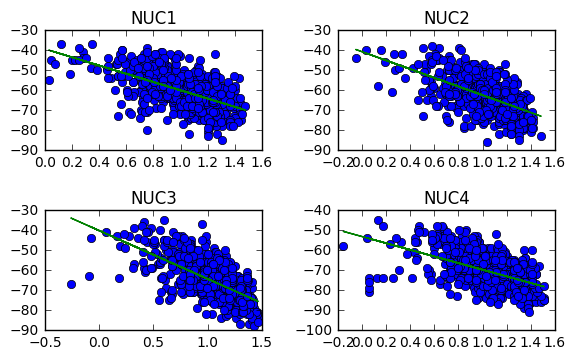

In [5]:
y1 = []
y2 = []
y3 = []
y4 = []

for i in range (0, 600):
    y1.append(a1*logDist1[i] + b1)
    y2.append(a2*logDist2[i] + b2)
    y3.append(a3*logDist3[i] + b3)
    y4.append(a4*logDist4[i] + b4)

lin1 = np.transpose(y1)
lin2 = np.transpose(y2)
lin3 = np.transpose(y3)
lin4 = np.transpose(y4)

# Plot graphs

#plt.figure(1)
plt.subplot(221)
plt.plot(logDist1, df['NUC1'], 'o')
plt.plot(logDist1, lin1)
plt.title("NUC1")

#plt.figure(2)
plt.subplot(222)
plt.plot(logDist2, df['NUC2'], 'o')
plt.plot(logDist2, lin2)
plt.title("NUC2")

#plt.figure(3)
plt.subplot(223)
plt.plot(logDist3, df['NUC3'], 'o')
plt.plot(logDist3, lin3)
plt.title("NUC3")

#plt.figure(4)
plt.subplot(224)
plt.plot(logDist4, df['NUC4'], 'o')
plt.plot(logDist4, lin4)
plt.title("NUC4")

plt.subplots_adjust(top=1, bottom=0.25, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

plt.show()